<a href="https://colab.research.google.com/github/sh4r-KO/SchoolWork/blob/main/tp2_knn_aguirre_cabrol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_digits
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# on charge les données
digits = load_digits()

print("Nombre total d'échantillons :", len(digits.data))
print("Dimensions des images :", digits.images[0].shape)
print("Classes disponibles :", digits.target_names)

Nombre total d'échantillons : 1797
Dimensions des images : (8, 8)
Classes disponibles : [0 1 2 3 4 5 6 7 8 9]


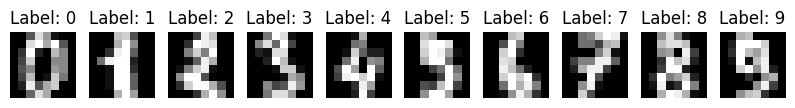

In [ ]:
fig, axes = plt.subplots(1, 10, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f"Label: {digits.target[i]}")
    ax.axis('off')
plt.show()

In [ ]:
#on sépare les données et les labels
X = digits.data
y = digits.target

# on créer les set de test et de train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#apercu des dimensions des set de train/test
print("Entraînement \t:", X_train.shape, y_train.shape)
print("Test\t\t:", X_test.shape, y_test.shape)


Entraînement 	: (1437, 64) (1437,)
Test		: (360, 64) (360,)


In [ ]:
k = 7
#on implémente l'algorithme K-Nearest Neighbors.
#il est utilisé pour la classification basée sur la proximité des donnée
knn = KNeighborsClassifier(n_neighbors=k)
print(X_train[0])
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)


[ 0.  0.  3. 14.  1.  0.  0.  0.  0.  0. 12. 12.  0.  0.  0.  0.  0.  3.
 16.  6.  0.  0.  0.  0.  0.  5. 16.  2.  0.  0.  0.  0.  0.  6. 16.  2.
  5.  2.  0.  0.  0.  4. 16.  2. 12. 15.  2.  0.  0.  1. 14. 13.  2. 13.
 11.  0.  0.  0.  3. 11. 16. 13.  4.  0.]


[Text(0.5, 23.52222222222222, 'guess value'),
 Text(50.722222222222214, 0.5, 'real value'),
 Text(0.5, 1.0, 'Confusion Matrix')]

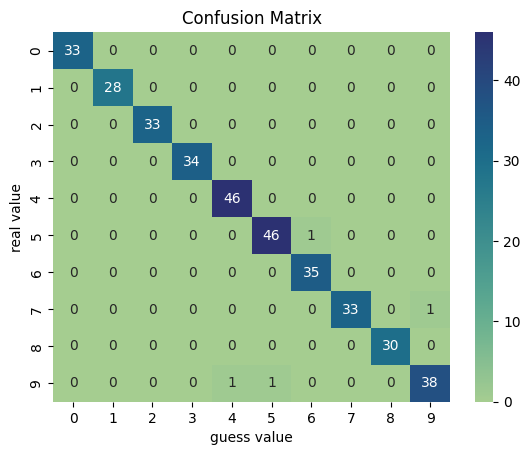

In [ ]:
# Matrice de confusion
from string import ascii_uppercase
from pandas import DataFrame
import numpy as np
import seaborn as sn
from sklearn.metrics import confusion_matrix

columns = [(i) for i in ["0","1","2","3","4","5","6","7","8","9"][0:len(np.unique(y_test))]]
confm = confusion_matrix(y_test, y_pred)
df_cm = DataFrame(confm, index=columns, columns=columns)

s = sn.heatmap(df_cm, cmap='crest', annot=True)
s.set(xlabel='guess value', ylabel='real value',title='Confusion Matrix')


#on observe une très bonne précision de la part du modèle, avec cepednant 6 erreurs


Rapport de classification :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        34
           4       0.98      1.00      0.99        46
           5       0.98      0.98      0.98        47
           6       0.97      1.00      0.99        35
           7       1.00      0.97      0.99        34
           8       1.00      1.00      1.00        30
           9       0.97      0.95      0.96        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



[Text(0.5, 23.52222222222222, ''), Text(50.722222222222214, 0.5, '')]

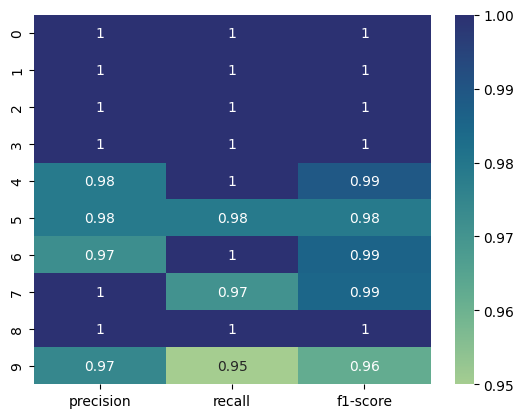

In [ ]:
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report
import pandas as pd

#print("\nRapport de classification :")
#print(classification_report(y_test, y_pred))
clf_report = classification_report(y_test, y_pred,output_dict=True)


data = pd.DataFrame(clf_report).iloc[:-1, :-3].T
ax = sns.heatmap(data,cmap="crest",annot = True)
ax.set(xlabel="", ylabel="")

# Pour le rapport de classification, on peut voir la précision et la confirmer au vu des résultats de la matrice suivante.
# Etant donné que la classe 9 est celle où l'on a le moins bien prédit, on se retrouve avec une précision plus faible que les autres classes

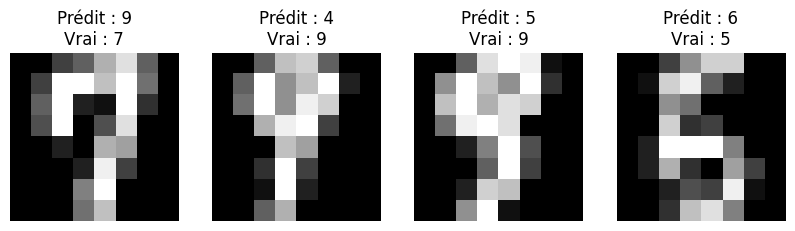

In [ ]:
# Trouver les indices des prédictions incorrectes
incorrect_indices = [i for i, (pred, true) in enumerate(zip(y_pred, y_test)) if pred != true]

# Visualiser les 6 erreurs qu'on a observé dans la matrice de confusion
fig, axes = plt.subplots(1, 4, figsize=(10, 3))
for i, ax in enumerate(axes):
    index = incorrect_indices[i]
    ax.imshow(X_test[index].reshape(8, 8), cmap='gray')
    ax.set_title(f"Prédit : {y_pred[index]}\nVrai : {y_test[index]}")
    ax.axis('off')
plt.show()

# au vu des erreurs, on peux omprendre pourquoi la plupart de ces valeurs on été coupable d'erreur, il est difficile même pour nous de faire la différence

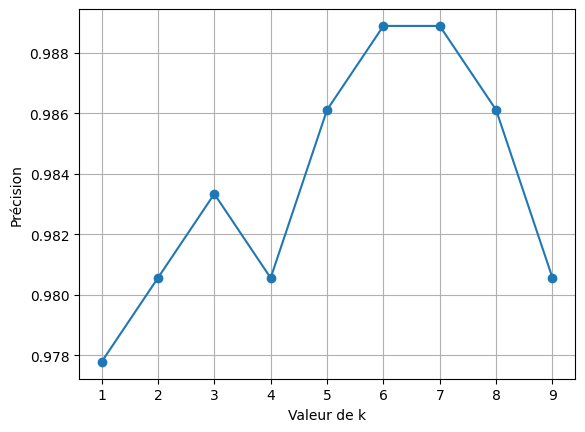

In [ ]:
accuracies = []
k_values = range(1, 10)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    acc = knn.score(X_test, y_test)
    accuracies.append(acc)

plt.plot(k_values, accuracies, marker='o')
plt.xlabel("Valeur de k")
plt.ylabel("Précision")
plt.grid()
plt.show()


#le graphique suivant atteste de l'impact de k sur la précision:
#on voit que plus k est grand, pire est la précision, et plus k est petit, meilleure est la précision
# on voit également que si k est trop petit, on perd en précision.